>#### 2.2

In [5]:
import torch
import numpy as np
# import matplotlib.pyplot as plt

In [6]:
r0 = torch.tensor(1.0).float()      #Tensor 생성 시 float()를 꼭 붙여서 float32로 변환!!(nn.Linear에서 에러 발생)
print(type(r0))
print(r0.dtype)
print(r0.shape)
print(r0.data)

<class 'torch.Tensor'>
torch.float32
torch.Size([])
tensor(1.)


In [7]:
r1_np = np.array([1,2,3,4,5])
print(r1_np.shape)

r1 = torch.tensor(r1_np).float()
print(r1.dtype)
print(r1.shape)
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [8]:
r2_np = np.array([[1,5,6], [4,3,2]])
print(r2_np.shape)

r2 = torch.tensor(r2_np).float()
print(r2.shape)
print(r2.data)


(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [9]:
torch.manual_seed(123)
r3 = torch.randn((3,2,2))
print(r3.shape)
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [10]:
# r4 = torch.ones((2,3,2,2))
r4_np = np.arange(24).reshape(2,3,2,2)
r4 = torch.tensor(r4_np)


print(r4.shape)
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[ 0,  1],
          [ 2,  3]],

         [[ 4,  5],
          [ 6,  7]],

         [[ 8,  9],
          [10, 11]]],


        [[[12, 13],
          [14, 15]],

         [[16, 17],
          [18, 19]],

         [[20, 21],
          [22, 23]]]], dtype=torch.int32)


In [11]:
r5 = r1.long()
print(r5.dtype)

torch.int64


In [12]:
r6 = r3.view(3,-1)
print(r6.shape)
print(r6.data)      #print(r6)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [13]:
r7 = r3.view(-1)
print(r7.shape)
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [14]:
print('requires_grad:', r1.requires_grad)       #자동 미분?
print('device:', r1.device)

requires_grad: False
device: cpu


In [15]:
item = r0.item()
print(type(item))
print(item)

<class 'float'>
1.0


In [16]:
t1 = torch.ones(1)
print(t1.shape)
print(t1)
print(t1.item())

torch.Size([1])
tensor([1.])
1.0


In [17]:
print(r2)
print(r2.max())
print(torch.max(r2,1))
print(torch.max(r2,1)[0])   #max values
print(torch.max(r2,1)[1])   #indices of max values

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)
torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))
tensor([6., 4.])
tensor([2, 0])


>#### 2.4

In [80]:
#1.경사 계산용 변수의 정의
x_np = np.arange(-2,2.1,0.25)
x_np

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [81]:
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
x, x.shape

(tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
          0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
          2.0000], requires_grad=True),
 torch.Size([17]))

In [82]:
#2.텐서 변수 간의 계산
y = 2 * x**2 +2     #y도 자동적으로 텐서 변수가 됨
y

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)

In [83]:
# plt.plot(x.data, y.data)
# plt.show()

In [84]:
z = y.sum()

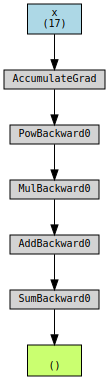

In [85]:
#3. 계산 그래프 시각화
from torchviz import make_dot

g = make_dot(z, params={'x': x})
display(g)

In [50]:
#4. 경사 계산
z.backward()

In [51]:
print(x)
print(x.grad)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)
tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


In [52]:
# 미분 잘되었는지 확인!
# plt.plot(x.data, y.data, c='b', label='y')
# plt.plot(x.data, x.grad.data, c='r', label='y.grad')
# plt.legend()
# plt.show()

In [53]:
# 초기화
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


>#### 2.5

##### 직접 함수 사용

In [99]:
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
y = 1/(1+torch.exp(-x))
# z = sum(y)
z = y.sum()

In [100]:
# plt.plot(x.data,y.data)
# plt.show()

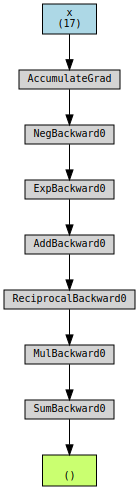

In [101]:
g = make_dot(z, params={'x': x})
display(g)

In [102]:
z.backward()
print(x.grad)
x.grad.zero_()
print(x.grad)


tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


##### torch.nn.Sigmoid() 사용

In [92]:
sigmoid = torch.nn.Sigmoid()
y = sigmoid(x)

In [93]:
# plt.plot(x.data,y.data)
# plt.show()

In [94]:
z = y.sum()

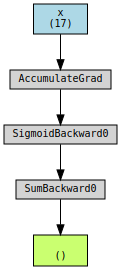

In [95]:
g = make_dot(z, params={'x':x})
display(g)

In [61]:
z.backward()
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


In [97]:
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
y = x**2
z = y.sum()



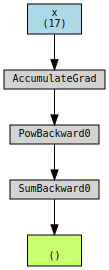

In [98]:
g = make_dot(z, params={'x': x})
display(g)


In [78]:
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### x.sum()과 sum(x)... 전자 사용

In [ ]:
import numpy as np
import torch

a_np = np.array([1, 2, 3, 4, 5])
a_torch = torch.tensor([1, 2, 3, 4, 5])

print(np.sum(a_np))  # Output: 15
print(a_np.sum())    # Output: 15

print(torch.sum(a_torch))  # Output: tensor(15)
print(a_torch.sum())       # Output: tensor(15)
